# Introduction to NumPy

The fundamental package for scientific computing with Python: https://numpy.org/ \
(**paper**) [Nature volume 585, pages 357–362 (2020)](https://doi.org/10.1038/s41586-020-2649-2) 

**Abstract**\
Array programming provides a powerful, compact and expressive syntax for accessing, manipulating and operating on data in vectors, matrices and higher-dimensional arrays. 
NumPy is the primary array programming library for the Python language. It has an essential role in research analysis pipelines in fields as diverse as physics, chemistry, astronomy, geoscience, biology, psychology, materials science, engineering, finance and economics. 
For example, in astronomy, NumPy was an important part of the software stack used in the discovery of gravitational waves1 and in the first imaging of a black hole. 


# References
1. https://library.mcmaster.ca/intro-python-programming
2. https://numpy.org/doc/stable/user/quickstart.html
3. https://training.sharcnet.ca/courses/enrol/index.php?id=132

In [4]:
import numpy as np # load numpy as np

# Arrays
([additional tutorial](https://www.learndatasci.com/tutorials/applied-introduction-to-numpy-python-tutorial/))

![Arrays](/Users/ravh011/Documents/McMaster/Courses/CHEM_4PB3_2022/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg)



In [4]:
X = np.array([[1, 2], [3, 4]])  # Defining arrays

print(X)
print('X type:', type(X))

n_rows, n_cols = X.shape
print('Size:')
print('number of rows:',n_rows)
print('number of columns:', n_cols)

[[1 2]
 [3 4]]
X type: <class 'numpy.ndarray'>
Size:
number of rows: 2
number of columns: 2


Change the value of the array

```X[i,j]``` -> single element in the i-th row and j-th column\
```X[:,j]``` -> all elements in the j-th column\
```X[i,:]``` -> all elements in the i-th row

In [9]:
print('Original: \n', X)
print('\n')
print('X[0,0] = ', X[0,0])
X[0,0] = 10
print('\n')
print('Modified: \n', X)

print('\n')
X[:,1] = -1 #select first column
print(X)

Original: 
 [[10 -1]
 [ 3 -1]]


X[0,0] =  10


Modified: 
 [[10 -1]
 [ 3 -1]]


[[10 -1]
 [ 3 -1]]


## Excercises
(tips) [NumPy documentation](https://numpy.org/doc/stable/index.html)

In [4]:
# create an array full of zeros with size (10,4)


In [5]:
# create an array full of zeros with size (12,), where the element 6 has the value of 4


# The power of NumPy

Here we revise some operations we can do using Numpy

In [6]:
#load some data (Solubility from https://github.com/whitead/dmol-book/blob/main/data/curated-solubility-dataset.csv)
D = np.load('../data/solubility.npy')
print(D.shape) 

(9982,)


## Mean and standard deviation

$\mu = \frac{1}{N}\sum_i^{N} x_i$\
$\sigma =  \sqrt\frac{\sum_i^{N}{(x_i-\mu)^2}}{N}$


In [7]:
mu = np.mean(D)
print('mu = ', mu)
std = np.std(D)
print('std = ', std)

mu =  -2.8899088047869865
std =  2.368035824195331


## Exercises

Using ```np.sum()```,```np.sqrt()```, ```D.shape```, and ```np.power()``` create a function that computes the **mean** and **standard deviation** of an given array.

In [8]:
def f(x):
    mu =  # compute mean

    std =  # compute std

    return mu, std


SyntaxError: invalid syntax (2349222592.py, line 2)

# Tensors (Matrices of Matrices)

What data strcuture could be represented with **TENSORS**?

![Arrays](/Users/ravh011/Documents/McMaster/Courses/CHEM_4PB3_2022/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg)



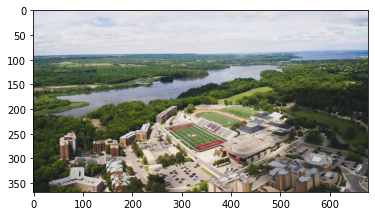

In [16]:
%matplotlib inline
from PIL import Image
import requests  # pip install requests
from io import BytesIO

import matplotlib
import matplotlib.pyplot as plt

# load image
response = requests.get(
    'https://future.mcmaster.ca/wp-content/uploads/2020/07/Campus-with-Cootes_jpg.jpg')
img = Image.open(BytesIO(response.content))
plt.imshow(img)


In [17]:
# convert image to NumPy
img_np = np.asarray(img)
print(img_np.shape)


(368, 678, 3)


RGB image. R, G, and B chanels

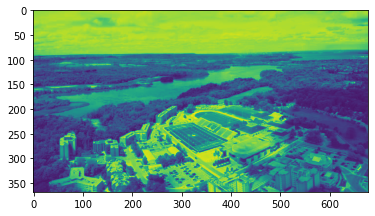

In [22]:
plt.imshow(img_np[:,:,0])